In [1]:
from os.path import join

import numpy as np
from numpy.random import choice
from scipy.io import loadmat

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
np.random.seed(42)

In [2]:
letters_train = loadmat(join('..', 'DATA', 'lettersTrainSet.mat'))
letters_test = loadmat(join('..', 'DATA', 'lettersTestSet.mat'))

XTrain, TTrain = letters_train['XTrain'], letters_train['TTrain_cell']
XTest, TTest = letters_test['XTest'], letters_test['TTest_cell']

# By default, Keras expects data in form (batch, height, width, channels) 
XTrain = np.transpose(XTrain, axes=[3, 0, 1, 2])
XTest = np.transpose(XTest, axes=[3, 0, 1, 2])

# Unpack nested structs to get ordinary strings
TTrain = np.array([item[0][0] for item in TTrain])
TTest = np.array([item[0][0] for item in TTest])

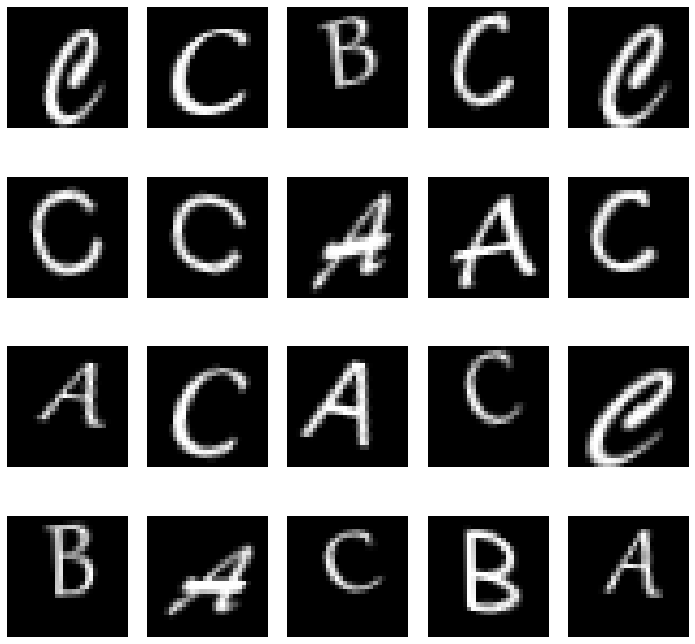

In [3]:
nimages, ny, nx, _ = XTrain.shape
samples = np.squeeze(XTrain[choice(nimages, size=20)])

fig, axs = plt.subplots(4, 5, figsize=(10, 10))
for ax, image in zip(axs.flat, samples):
    ax.imshow(image, cmap='gray')
    ax.axis(False)
plt.tight_layout()

In [4]:
# Distict characters
classes = np.unique(TTrain)
nclasses = len(classes)

# Map character classes to integers
to_index = dict(zip(classes, range(nclasses)))
y_train_labels = [to_index[item] for item in TTrain]
y_test_labels = [to_index[item] for item in TTest]

# One-hot encode classes
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

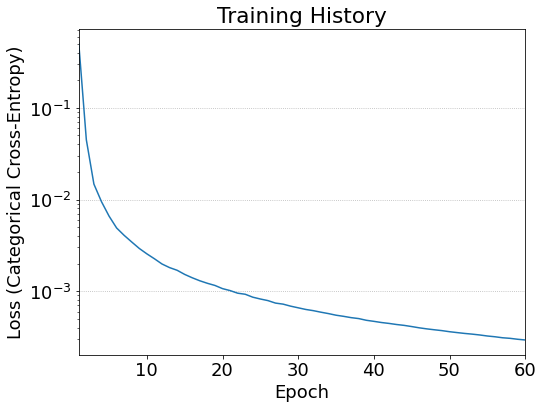

In [5]:
# Create model of four layers
model = Sequential([
    Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=XTrain.shape[1:]),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer=SGD(momentum=0.9), loss='categorical_crossentropy')
history = model.fit(XTrain, y_train, epochs=60, verbose=0)
loss_history = history.history['loss']

fig, ax = plt.subplots(figsize=(8, 6))
ax.semilogy(range(1, len(loss_history)+1), loss_history)
ax.grid(axis='y', linestyle=':')
ax.margins(0, 0.05)
ax.set_ylabel('Loss (Categorical Cross-Entropy)')
ax.set_xlabel('Epoch')
ax.set_title('Training History');

In [6]:
# Taking the argmax reverses the one-hot encoding scheme
YPredict = np.argmax(model.predict(XTest), axis=1)

accuracy = np.sum(YPredict == y_test_labels) / len(y_test_labels)
print(f'Accuracy = {100*accuracy:0.1f}%')

Accuracy = 90.7%
